In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
trainx = np.loadtxt("trainx.csv", delimiter= ",")
testx = np.loadtxt("testx.csv", delimiter=",")
traint = np.hstack((np.zeros(50, ), np.ones(50, )))
testt = np.hstack((np.zeros(200, ), np.ones(200, )))

In [35]:
class0_pos = np.where(traint == 0)[0] #training examples where label equal to 0
class0_mean = trainx[class0_pos, :].mean(axis = 0)
class0_var = trainx[class0_pos, :].var(axis = 0)

class1_pos = np.where(traint == 1)[0]
class1_mean = trainx[class1_pos, :].mean(axis = 0)
class1_var = trainx[class1_pos, :].var(axis = 0)

In [4]:
train = pd.DataFrame(trainx, columns= ["X", "Y", "label"])
train.head()

,X,Y,label
0,-0.412221,-1.214139,0
1,-0.139011,-0.278391,0
2,0.680692,-0.074141,0
3,-0.368678,-0.500838,0
4,0.775973,-1.125245,0


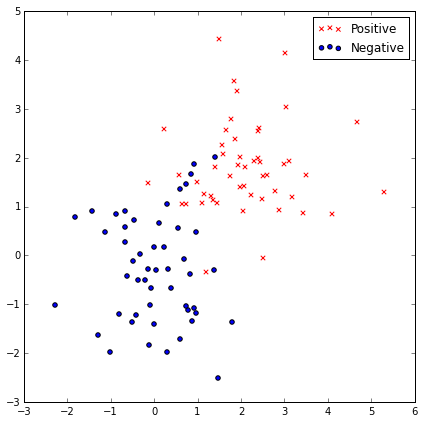

In [19]:
train_pos = train[train["label"] == 1]
train_neg = train[train["label"] == 0]
plt.figure(figsize=(7, 7))
plt.scatter(train_pos["X"], train_pos["Y"], label="Positive", marker="x", c="r")
plt.scatter(train_neg["X"], train_neg["Y"], label="Negative", marker="o", c="b")
plt.legend()

In [24]:
print train_pos.shape, train_neg.shape

(50, 3) (50, 3)


In [11]:
test = pd.DataFrame(testx, columns= ["X", "Y", "label"])
test.head()

,X,Y,label
0,-0.596839,0.770252,0
1,-2.089257,0.805570,0
2,0.858501,-0.614506,0
3,-1.795914,-0.005083,0
4,0.303689,0.314454,0


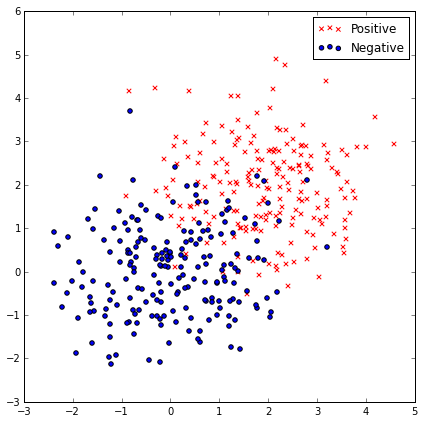

In [38]:
test_pos = test[test["label"] == 1]
test_neg = test[test["label"] == 0]
plt.figure(figsize=(7, 7))
plt.scatter(test_pos["X"], test_pos["Y"], label="Positive", marker="x", c="r")
plt.scatter(test_neg["X"], test_neg["Y"], label="Negative", marker="o", c="b")
plt.legend()

In [21]:
def likelihood(test_point, mean, variance, prior):
    totalLike = 1.0
    for i, x in enumerate(test_point):
        totalLike *= 1.0 / (np.sqrt(2.0* np.pi)) #calculate likelihood based on conditional class distribution parameters
        totalLike *= 1.0 / np.sqrt(variance[i])
        totalLike *= np.exp((-1.0/(2.0*variance[i]))*(x - mean[i])**2) 
    return totalLike * prior #multiply by class prior probability

In [39]:
like0, like1 = [], []
for i in range(len(testx)):
    test_point = testx[i, :2]
    #calculate likelihoods for class 0 and 1
    like0.append(likelihood(test_point, class0_mean, class0_var, 0.5))
    like1.append(likelihood(test_point, class1_mean, class1_var, 0.5))
like0, like1 = np.array(like0), np.array(like1)

In [42]:
test["prob0"] = like0/(like0 + like1) #normalize to obtain probabilities
test["prob1"] = like1/(like0 + like1)
test["predict"] = np.where(test["prob0"] > 0.5, 0, 1) #assign prediction based on probability cutoff of 0.5
test.tail()

,X,Y,label,prob0,prob1,predict
395,2.665358,1.318742,1,0.004603,0.995397,1
396,3.606899,2.681156,1,0.000024,0.999976,1
397,1.321159,2.926934,1,0.013254,0.986746,1
398,2.562177,1.423970,1,0.005127,0.994873,1
399,1.379153,4.042354,1,0.003374,0.996626,1


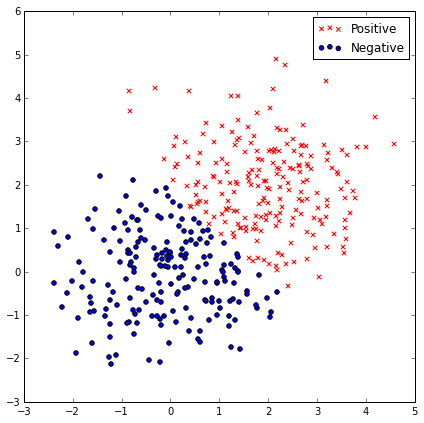

In [45]:
pred_pos = test[test["predict"] == 1]
pred_neg = test[test["predict"] == 0]
plt.figure(figsize=(7, 7))
plt.scatter(pred_pos["X"], pred_pos["Y"], label="Positive", marker="x", c="r")
plt.scatter(pred_neg["X"], pred_neg["Y"], label="Negative", marker="o", c="b")
plt.legend()

In [46]:
print "Prediction accuracy:", np.mean(test.label == test.predict)

Prediction accuracy: 0.89


In [4]:
def euclid(p1, p2):
    length = len(p1)
    return np.sqrt(np.sum((p1 - p2)**2))

In [17]:
import random

In [19]:
distances = []
testp = testx[0, :2]
for i in xrange(len(trainx)):
    distances.append(euclid(testp, trainx[i, :2]))
mini = np.argsort(distances)[:5]
print np.array(distances)[mini]
print trainx[mini, 2]

[ 0.14899493  0.15360413  0.19542856  0.29864033  0.49304833]
[ 0.  0.  0.  0.  0.]


In [25]:
def response(classes):
    counts = {}
    for c in classes:
        if c in counts:
            counts[c] += 1
        else:
            counts[c] = 1
    maxcount = max(counts.values())
    maxclass = []
    for c in counts.keys():
        if counts[c] == maxcount:
            maxclass.append(c)
    return random.choice(maxclass)

1

In [71]:
def knn(testpoints, trainx, k=5, graph=False):
    testpreds = []
    for i in range(len(testpoints)):
        testp = testpoints[i, :2] #choose test point
        distances = []
        for j in xrange(len(trainx)):  #find distances to points in training set 
            distances.append(euclid(testp, trainx[j, :2]))
        distances = np.array(distances)
        mini = np.argsort(distances)[:k]  #find k smallest distances
        mclasses = trainx[mini, 2]  #classes of points with k smallest distances
        pred_class = response(mclasses) #find majority class of these points
        testpreds.append(pred_class)
    if graph:
        df = test.copy()
        df["Pred"] = testpreds
        pred_pos = df[df["Pred"] == 1.0]
        pred_neg = df[df["Pred"] == 0.0]
        plt.figure(figsize=(7, 7))
        plt.scatter(pred_pos["X"], pred_pos["Y"], c="r", marker="x", label="Positive")
        plt.scatter(pred_neg["X"], pred_neg["Y"], c="b", marker="o", label="Negative")
        plt.legend()
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("KNN for k = %d" %k)
    return np.mean(test.label == testpreds)

Prediction accuracy: 0.88


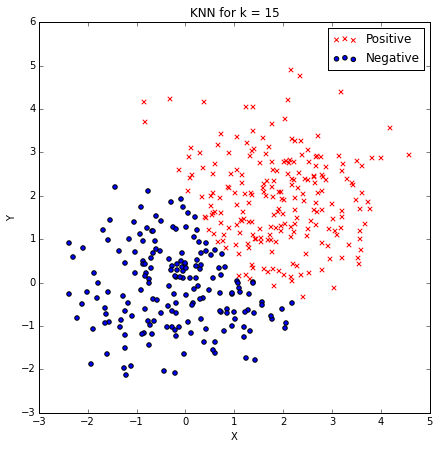

In [68]:
knn(testx, trainx, k=15, graph=True)

In [73]:
ks = [1, 2, 5, 10, 15, 20, 25, 50, 75]
for k in ks:
    print "Accuracy for k=%d is %0.3f" %(k, knn(testx, trainx, k=k)) 

Accuracy for k=1 is 0.843
Accuracy for k=2 is 0.838
Accuracy for k=5 is 0.882
Accuracy for k=10 is 0.880
Accuracy for k=15 is 0.880
Accuracy for k=20 is 0.885
Accuracy for k=25 is 0.892
Accuracy for k=50 is 0.892
Accuracy for k=75 is 0.897


In [5]:
train.head()

,X,Y,label
0,-0.412221,-1.214139,0
1,-0.139011,-0.278391,0
2,0.680692,-0.074141,0
3,-0.368678,-0.500838,0
4,0.775973,-1.125245,0


In [7]:
from sklearn.svm import SVC

In [9]:
svc = SVC(C=1.0)
Xtrain = train[["X", "Y"]]
ytrain = train["label"]
svc.fit(Xtrain, ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [12]:
Xtest = test[["X", "Y"]]
ytest = test["label"]
preds = svc.predict(Xtest)

In [26]:
def svc(xtrain, ytrain, xtest, ytest, C=1.0, kernel="rbf", graph=False):
    svc = SVC(C = C, kernel=kernel)
    svc.fit(xtrain, ytrain)  #train SVC
    preds = svc.predict(xtest)
    if graph:
        print "Accuracy:", np.mean(preds == ytest)
        df = test.copy()
        test["predict"] = preds
        pred0 = test[test["predict"] == 0]
        pred1 = test[test["predict"] == 1]
        plt.figure(figsize=(7, 7))
        plt.scatter(pred0["X"], pred0["Y"], label="Positive", marker="x", color="r")
        plt.scatter(pred1["X"], pred1["Y"], label="Negative", marker="o", color="b")
        plt.legend()
        plt.xlabel("X")
        plt.ylabel("Y")

Accuracy: 0.8025


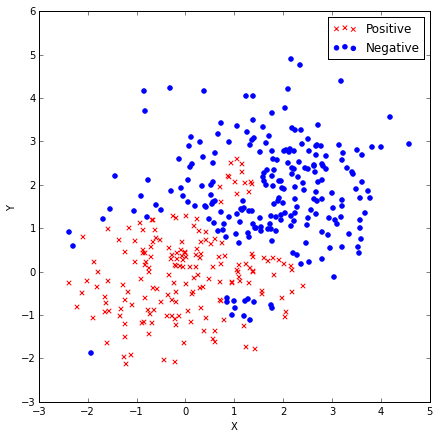

In [29]:
svc(Xtrain, ytrain, Xtest, ytest, C=1000.0, kernel="rbf", graph=True)

In [51]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [56]:
def confuse(xtrain, ytrain, xtest, ytest, C=1.0, kernel="rbf"):
    svc = SVC(C=C, kernel=kernel)
    svc.fit(xtrain, ytrain)
    preds = svc.predict(xtest)
    matrix = confusion_matrix(ytest, preds)
    truepos = float(matrix[0][0])  #obtain true positive and other types from matrix
    trueneg = float(matrix[1][1])
    falsepos = float(matrix[0][1])
    falseneg = float(matrix[1][0])
    print "Sensitivity:", truepos/(truepos + falseneg)
    print "Specificity:", trueneg/(trueneg + falsepos), "\n"
    print matrix, "\n"
    print classification_report(ytest, preds)

In [41]:
confuse(Xtrain, ytrain, Xtest, ytest, C=1.1)

Sensitivity: 0.943181818182
Specificity: 0.848214285714 

[[166  34]
 [ 10 190]] 

             precision    recall  f1-score   support

        0.0       0.94      0.83      0.88       200
        1.0       0.85      0.95      0.90       200

avg / total       0.90      0.89      0.89       400



In [89]:
def roc_plot(xtrain, ytrain, xtest, ytest, C=1.0, kernel="rbf"):
    svc = SVC(C=C, kernel=kernel, probability=False)
    svc.fit(xtrain, ytrain)
    preds = svc.predict(xtest)
    fpr, tpr, thresholds = roc_curve(ytest, preds)
    area = auc(fpr, tpr) #calculate area under curve
    plt.figure(figsize=(7, 7))
    plt.plot(fpr, tpr, lw=2, label="ROC curve (area=%0.4f)" % area, color="orange")
    plt.xlabel("False positive rate")
    plt.title("ROC curve for SVC with $\gamma$ = %0.2f and %s kernel" %(C, kernel))
    plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
    plt.ylabel("True positive rate")
    plt.legend(loc="lower right")

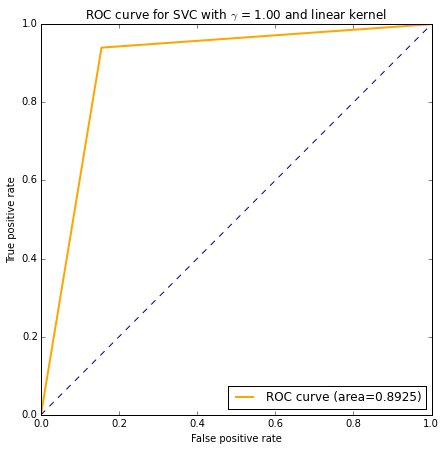

In [90]:
roc_plot(Xtrain, ytrain, Xtest, ytest, C=1.0, kernel="linear")